# Distributions, Contours and Everything Else

In [39]:
import numpy as np
np.random.seed(1337)

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('ggplot')

In [28]:
num_bins = 50  # number of bins in each dimension  Try: 5, 20, 50, 500 
num_samples = 10000000

data = 100 + 10 * np.random.randn(num_samples, 2)  # generate 100000 2-d random data points
joint_probs, edges = np.histogramdd(data, bins=num_bins)

edges = np.array(edges)[:,1:]

In [29]:
print(edges) 

[[ 47.82128287  49.90611353  51.99094419  54.07577485  56.1606055
   58.24543616  60.33026682  62.41509748  64.49992813  66.58475879
   68.66958945  70.7544201   72.83925076  74.92408142  77.00891208
   79.09374273  81.17857339  83.26340405  85.34823471  87.43306536
   89.51789602  91.60272668  93.68755734  95.77238799  97.85721865
   99.94204931 102.02687996 104.11171062 106.19654128 108.28137194
  110.36620259 112.45103325 114.53586391 116.62069457 118.70552522
  120.79035588 122.87518654 124.9600172  127.04484785 129.12967851
  131.21450917 133.29933982 135.38417048 137.46900114 139.5538318
  141.63866245 143.72349311 145.80832377 147.89315443 149.97798508]
 [ 48.62087867  50.83391648  53.04695429  55.2599921   57.47302991
   59.68606772  61.89910553  64.11214333  66.32518114  68.53821895
   70.75125676  72.96429457  75.17733238  77.39037018  79.60340799
   81.8164458   84.02948361  86.24252142  88.45555923  90.66859704
   92.88163484  95.09467265  97.30771046  99.52074827 101.73378

In [30]:
joint_probs.shape

(50, 50)

In [31]:
joint_probs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
cut_point = 2


X_vals = np.array( joint_probs[cut_point] )     
X_vals /= X_vals.sum() 

# Brain twister: why do we need the cast to np array here? 
# Hint: Leads to a HUGE bug in analysis if you don't. Can you figure out why? 
# Goes back to first semester 

Y_vals = np.array( [row[cut_point] for row in joint_probs]  ) 
Y_vals /= Y_vals.sum()

print("Cut X and Y on: ", cut_point)

Cut X and Y on:  2


In [33]:
print(edges[0])
print(X_vals)
print(Y_vals)

[ 47.82128287  49.90611353  51.99094419  54.07577485  56.1606055
  58.24543616  60.33026682  62.41509748  64.49992813  66.58475879
  68.66958945  70.7544201   72.83925076  74.92408142  77.00891208
  79.09374273  81.17857339  83.26340405  85.34823471  87.43306536
  89.51789602  91.60272668  93.68755734  95.77238799  97.85721865
  99.94204931 102.02687996 104.11171062 106.19654128 108.28137194
 110.36620259 112.45103325 114.53586391 116.62069457 118.70552522
 120.79035588 122.87518654 124.9600172  127.04484785 129.12967851
 131.21450917 133.29933982 135.38417048 137.46900114 139.5538318
 141.63866245 143.72349311 145.80832377 147.89315443 149.97798508]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.14285714 0.14285714 0.         0.14285714
 0.         0.14285714 0.         0.42857143 0.         0.
 0.         0.         0.         0.  

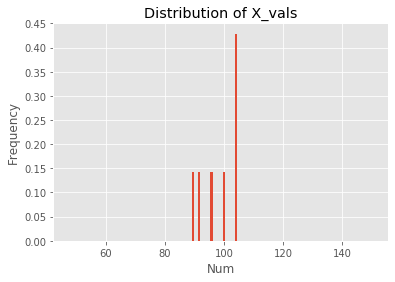

In [34]:
plt.bar(edges[0], X_vals)   #       
plt.ylabel('Frequency')
plt.xlabel('Num');
plt.title("Distribution of X_vals")
plt.show()

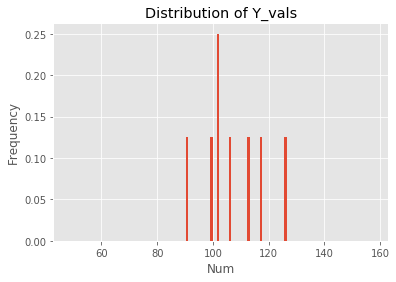

In [35]:
plt.bar(edges[1], Y_vals)   #       
plt.ylabel('Frequency')
plt.xlabel('Num');
plt.title("Distribution of Y_vals")
plt.show()

In [36]:
X = edges[0]
Y = edges[1]
X, Y = np.meshgrid(X, Y)

Z = joint_probs / joint_probs.sum()

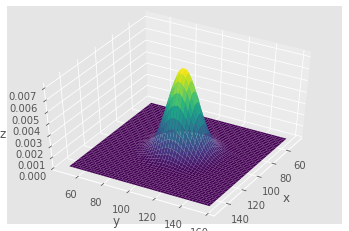

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

ax.view_init(45, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

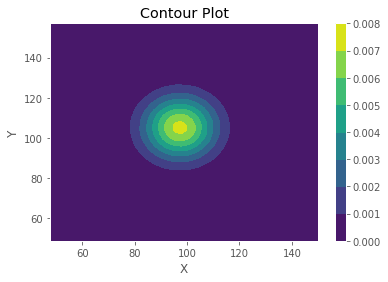

In [38]:
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## Dependence in Joints

In [46]:
import numpy as np

num_bins = 50   
num_samples = 10000

# Don't have to understand exactly how these values are being generated 
mean = [0, 0]
cov =  [[1, 0.8], 
        [0.8, 1.0]]  # diagonal covariance

data = 100 + 10 * np.random.multivariate_normal(mean, cov, num_samples)
joint_probs, edges = np.histogramdd(data, bins=num_bins)


edges = np.array(edges)[:,1:]
print(joint_probs)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
cut_point = 14    # try 9, 2 and 14 

X_vals = np.array(joint_probs[cut_point])
X_vals /= X_vals.sum() 

Y_vals = np.array( [row[cut_point] for row in joint_probs]  ) 
Y_vals /= Y_vals.sum()

print("Cut X and Y on: ", cut_point)

Cut X and Y on:  14


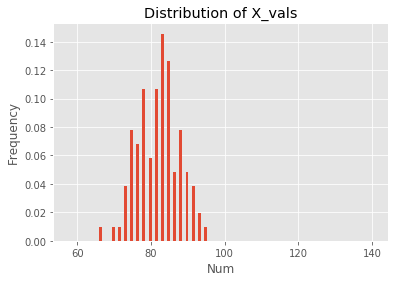

In [48]:
plt.bar(edges[0], X_vals)   #       
plt.ylabel('Frequency')
plt.xlabel('Num');
plt.title("Distribution of X_vals")
plt.show()

In [49]:
# plt.bar(edges[1], Y_vals)   #       Let's not do this for Y right now 
# plt.ylabel('Frequency')
# plt.xlabel('Num');
# plt.title("Distribution of Y_vals")
# plt.show()

In [50]:
X = edges[0]
Y = edges[1]
X, Y = np.meshgrid(X, Y)

Z = joint_probs / joint_probs.sum()

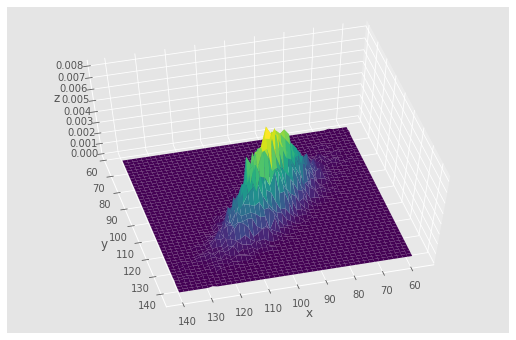

In [51]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

ax.view_init(60, 75)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

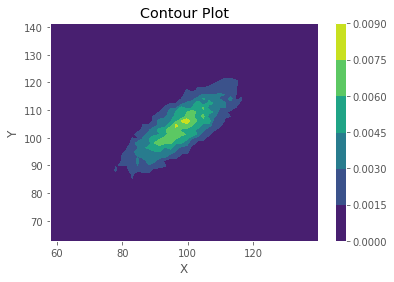

In [52]:
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()